In [2]:
#!/usr/local/bin/python3
# -*- coding: utf-8 -*-""
from time import time
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
import collections
from scipy.stats import randint, uniform
import scipy.stats as sps
from unidip import UniDip
import unidip.dip as dip
from statsmodels.nonparametric.bandwidths import bw_silverman
from sklearn.neighbors import KernelDensity
from scipy.signal import find_peaks
from sklearn.mixture import GaussianMixture as GMM

# Task №1
### Generate sample with 1000 values from 5 to 105

In [3]:
a = 5
b = 105

#sample size
n = 1000

#set random seed as current timestamp = seconds from 1970-01-01 00:00:00
np.random.seed(int(time()))

series = ((b - a) * np.random.rand(n) + a).astype(int)
data = pd.Series(series)

### Distribution's histogram
#### Answer:
Distribution is uniform, because all value in interval [5;105] have same probability, they are equally likely.

1) If we need to get new distribution, we can change python method to generate data whis other distribution; 

2) Change number of elements;

3) Transform uniform distribution to normal using Box–Muller transform
https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform

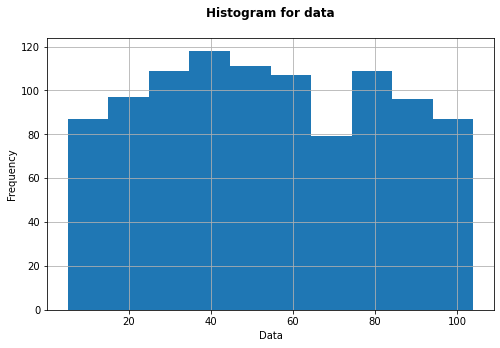

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))

#the histogram of the data
ax.hist(data)

plt.xlabel('Data')
plt.ylabel('Frequency')

ax.set_title(f'Histogram for data\n', 
            fontweight ="bold")


ax.grid()
plt.show()

## 1.Sample mean and expected value

The expectation of X is defined as
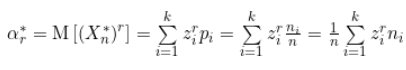


We know, that every variant zi has in sample x1,…,xn it's own frequency ni, so every products zi*ni we can provide as sum of ni same elements,which are equal to the variant zi, so:
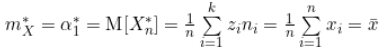
http://datalearning.ru/index.php/textbook?cid=1&mid=0&topic=2

In [5]:
# freq - frequencies for each unique value
# values - value for each frequency
freq = data.value_counts()
values = freq.index

#second calculated mean
Ex = (values * freq).sum() / freq.sum()

print(f'Expected value: {Ex}')

Expected value: 53.822


Formula to sample mean finding
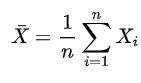

In [6]:
#calculated mean
meanCalc = data.sum() / n

print(f'Calculated mean: {meanCalc}')

Calculated mean: 53.822


#### As we can see, expected value and sample mean are equal
We can calculate it's value with using method of pd.Series()

In [7]:
#series method's mean
meanSeries = data.mean()

print(f"Series method's mean: {meanSeries}")

Series method's mean: 53.822


## 2. Sample Variance

Directly taking the variance of the sample data gives the average of the squared deviations: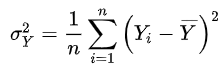 It's named biased sample variance.

In [8]:
#biased sample variance
varBiased = ((data - meanSeries) ** 2).sum() / n

print(f'Biased sample variance: {varBiased}')

Biased sample variance: 778.452316


Biased sample variance:
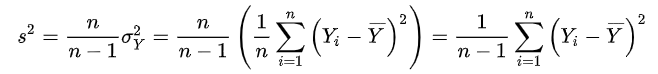
https://en.wikipedia.org/wiki/Variance

In [9]:
#unbiased sample variance
varUnBiased = ((data - meanSeries) ** 2).sum() / (n - 1)

print(f'Biased sample variance: {varUnBiased}')

Biased sample variance: 779.2315475475475


We can calculate variance with using method of pd.Series()

In [10]:
#series method's variance
varSeries = data.var()

print(f"Series method's variance: {varSeries}")

Series method's variance: 779.2315475475481


## 3.Sample standard deviation

If the biased sample variance (the second central moment of the sample, which is a downward-biased estimate of the population variance) is used to compute an estimate of the population's standard deviation, the result is:
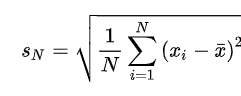

In [11]:
#sd based on biased sample variance
stdBiased = sqrt(varBiased)

print(f'Sample standard deviation based on biased sample variance: {stdBiased}')

Sample standard deviation based on biased sample variance: 27.900758340948368


An unbiased estimator for the variance is given by applying Bessel's correction, using N − 1 instead of N to yield the unbiased sample variance:
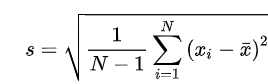
https://en.wikipedia.org/wiki/Standard_deviation#Uncorrected_sample_standard_deviation

In [12]:
#sd based on unbiased sample variance
stdUnBiased = sqrt(varUnBiased)

print(f'Sample standard deviation based on unbiased sample variance: {stdUnBiased}')

Sample standard deviation based on unbiased sample variance: 27.914719191629842


We can calculate variance with using method of pd.Series()

In [13]:
#series method's deviation
stdSeries = data.std()

print(f"Series method's deviation: {stdSeries}")

Series method's deviation: 27.914719191629853


## 4.Mode

In [14]:
#calculated mode: using list of frequencies freq from data.value_counts()
modeCalc = [key for key, value in collections.Counter(data).most_common() if value==max(freq)]

#series method's mode
modeSeries = list(data.mode())

print(f'Calculated mode: {modeCalc}',
      f"\nSeries method's mode: {modeSeries}")

Calculated mode: [39] 
Series method's mode: [39]


## 5.Median

In [15]:
#calculated median
medianCalc = (sorted(data)[n // 2] + sorted(data)[(n - 1) // 2]) / 2

#series method's mode
medianSeries = data.median()

print(f'Calculated median: {medianCalc}',
      f"\nSeries method's median: {medianSeries}")

Calculated median: 52.0 
Series method's median: 52.0


### Information from Series.describe()

In [16]:
data.describe()

count    1000.000000
mean       53.822000
std        27.914719
min         5.000000
25%        31.000000
50%        52.000000
75%        78.250000
max       104.000000
dtype: float64

### Some other stats

In [17]:
#Coefficient of variation
coeffVar = stdSeries / meanSeries

#Skewness
skew = (((data - meanSeries).sum()) ** 3) / n / varSeries ** 3

#Kurtosis
kurt = (((data - meanSeries).sum()) ** 4) / n / varSeries ** 4 - 3

print(f'Coefficient of variation: {coeffVar}',
      f'\nSkewness: {skew}',
      f'\nKurtosis:{kurt}')

Coefficient of variation: 0.51864886462097 
Skewness: -4.293037716245123e-47 
Kurtosis:-3.0


## Let's put mean, mode and median at hist

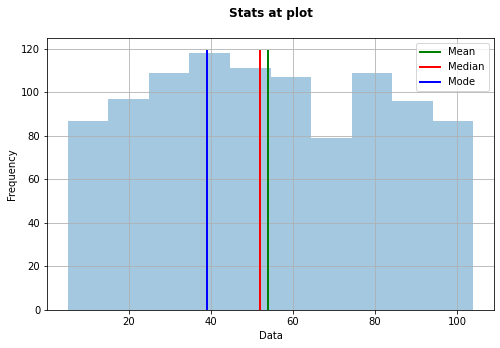

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))

#the histogram of the data
ax.hist(data, alpha=0.4)

plt.xlabel('Data')
plt.ylabel('Frequency')

ax.set_title(f'Stats at plot\n', 
            fontweight ="bold")

ax.plot([meanSeries] * 120, np.arange(0, 120), lw=2, color='Green')
ax.plot([medianSeries] * 120, np.arange(0, 120), lw=2, color='Red')
for i, mode in enumerate(modeSeries):
    ax.plot([modeSeries] * 120, np.arange(0, 120), lw=2, color='blue')

plt.legend(['Mean', 'Median', 'Mode'])
ax.grid()
plt.show()

# Task №2

Modalities of distributions

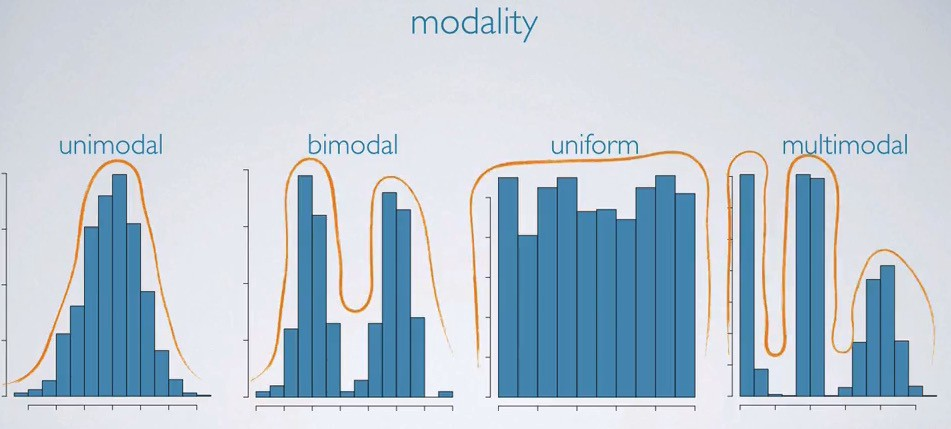

1) In statistics, a Multimodal distribution is a probability distribution with two different modes, which may also be referred to as a bimodal distribution. These appear as distinct peaks (local maxima) in the probability density function. Categorical, continuous, and discrete data can all form bimodal distributions.

More generally, a multimodal distribution is a probability distribution with two or more modes.


## Methods to analyse distribution modalities:
### 1) Kernel density estimations
In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.
#### We can create pdf of our sample, using KDE-method:
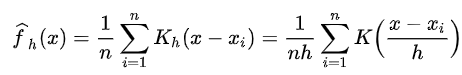where K is the kernel — a non-negative function — and h > 0 is a smoothing parameter called the bandwidth. 
#### We will use K - gaussan function, and differend h:

In [19]:
def getKernelDensityEstimation(values, x, bandwidth = 1, kernel = 'gaussian'):
    model = KernelDensity(kernel = kernel, bandwidth=bandwidth)
    model.fit(values[:, np.newaxis])
    log_density = model.score_samples(x[:, np.newaxis])
    return np.exp(log_density)

#### We know, that true pdf - uniform with parameters [a, b]
So, let's see, which different pdfs we can get from KDE:

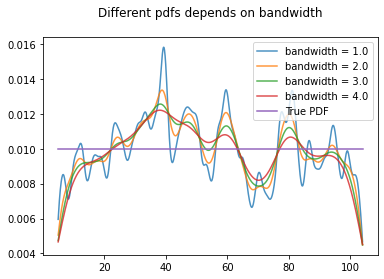

In [20]:
x = np.linspace(data.min(),data.max(), data.shape[0])

true_pdf = uniform(a, b-a).pdf(x)


for bandwidth in np.linspace(1, 4, 4):
    kde = getKernelDensityEstimation(data, x, bandwidth=bandwidth)
    plt.plot(x, kde, alpha = 0.8, label = f'bandwidth = {round(bandwidth, 2)}')
plt.plot(x, true_pdf, label = 'True PDF')
plt.legend()
plt.title('Different pdfs depends on bandwidth\n');

#### We need to use one, most appropriate for our sample. We can see, the more bandwidth the better approximations. Let's use one of the methods of choosing best bandwidth, for example bw_silverman:

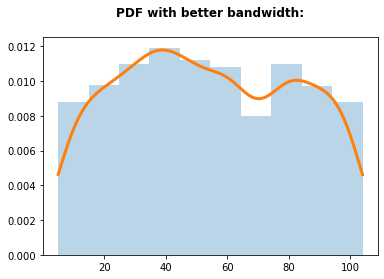

In [21]:
best_wd = bw_silverman(data)
best_kde = getKernelDensityEstimation(data, x, bandwidth=best_wd)

plt.hist(data, density=1, alpha=0.3)
plt.plot(x, best_kde, lw=3)
plt.title('PDF with better bandwidth:\n', fontweight ="bold");
plt.show()

### 2) Using extrema(local maxima) in the probability density function.
If function has 2 or more maximas, it's describe multimodal distribution, if one - unimodal, else - uniform distribution, which hasn't got modes.
### We can see data's pdf, using Series() methods:

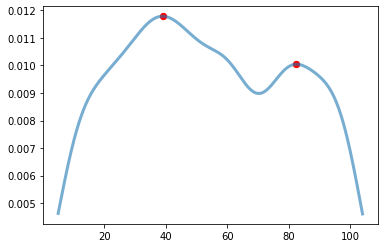

In [22]:
idx = find_peaks(best_kde)[0]
plt.plot(x, best_kde, lw=3, alpha=0.6)
ax = plt.gca()
for i in idx:
    plt.scatter(x[i], best_kde[i], s= 40, c = 'red')

### 3)Hartigan's Dip Test of Unimodality

The dip test measures multimodality in a sample by the maximum difference, over all sample points, between the empirical distribution function, and the unimodal distribution function that minimizes that maximum difference. The uniform distribution is the asymptotically least favorable unimodal distribution, and the distribution of the test statistic is determined asymptotically and empirically when sampling from the uniform.

The second value is the dip test p-value which < 0.05 shows that our data is not unimodal.

In [23]:
data = np.msort(data)
p_value = dip.diptst(data)[0]
print('H0 - hypothesis, that data is unimodal')
print(p_value, f', so H0 is {p_value > 0.05}')

H0 - hypothesis, that data is unimodal
0.016016129032258075 , so H0 is False


### 4) Tests for unimodality

If distribution is mixture of two normal distribution with the same standard deviations

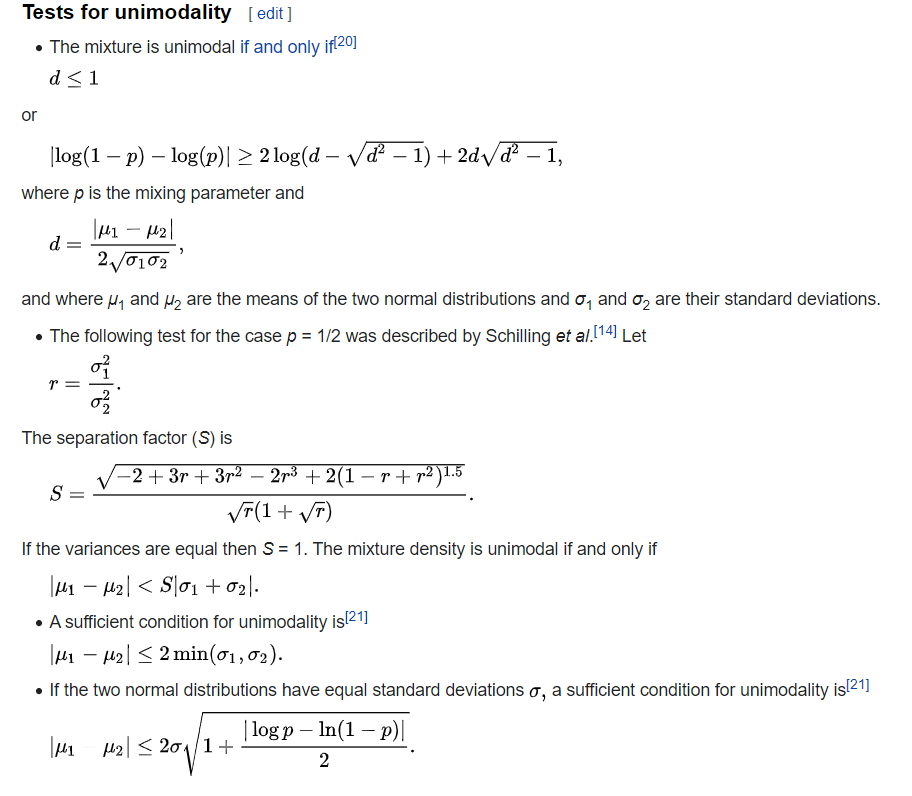

## Sample with mixture distribution. Finding masks of distributions.

### 1) EM - algorithm

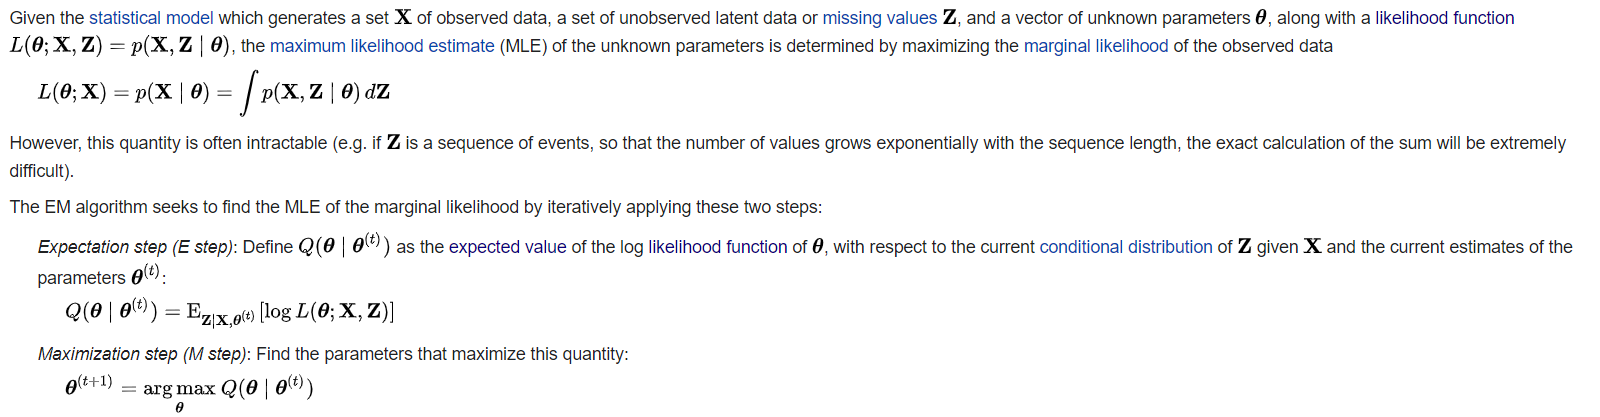
https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm

### 2) Kernel Mean Matching

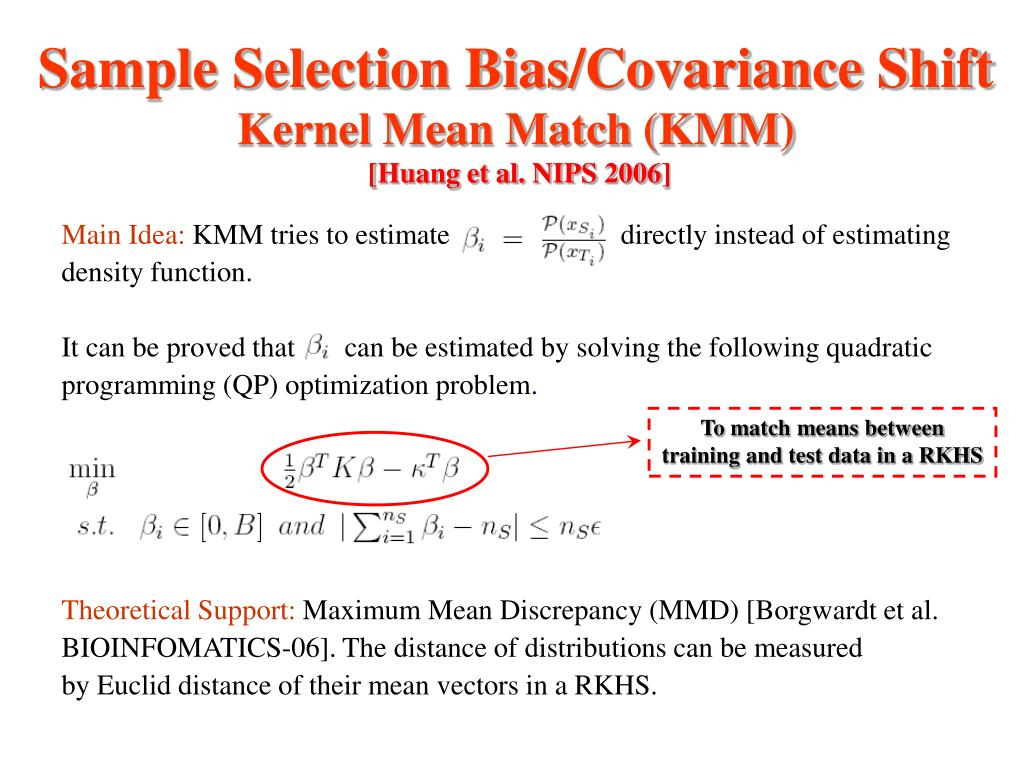